<a href="https://colab.research.google.com/github/Nath188/Regresion-Lineal-con-python-y-scikity-learn/blob/main/Insurance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos.


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [1]:
pip install --upgrade pip setuptools==57.5.0

In [2]:
pip install regressors

  Using cached regressors-0.0.3.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12398 sha256=636898b3deb23afb0b49870bc25c23351baa990761972ce9cd846cf2ebb085d3
  Stored in directory: /root/.cache/pip/wheels/85/e8/ec/b8fe5e2d41af2f4760b0d8ce1ae8f01c78df5d1b0883dee2fe
Successfully built regressors


In [3]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', context='notebook')

## Descargando los datos


In [9]:
df = pd.read_csv('/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1331, 7)


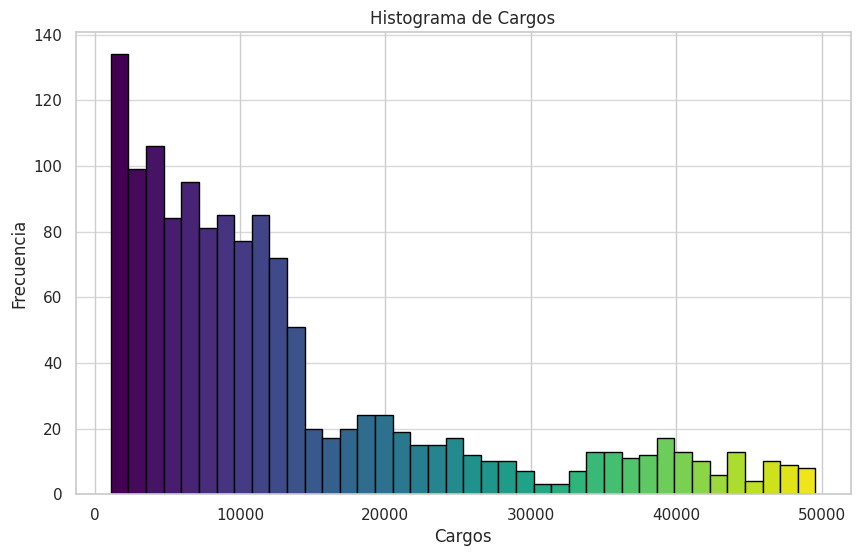

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

print(df.shape)

plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df['charges'], bins=40, color='skyblue', edgecolor='black')

for i in range(len(patches)):

    color = plt.cm.viridis(i / len(patches))
    patches[i].set_facecolor(color)

plt.title('Histograma de Cargos')
plt.xlabel('Cargos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [14]:
df[df.charges>50000]
df = df[df.charges<50000]

## correlaciones


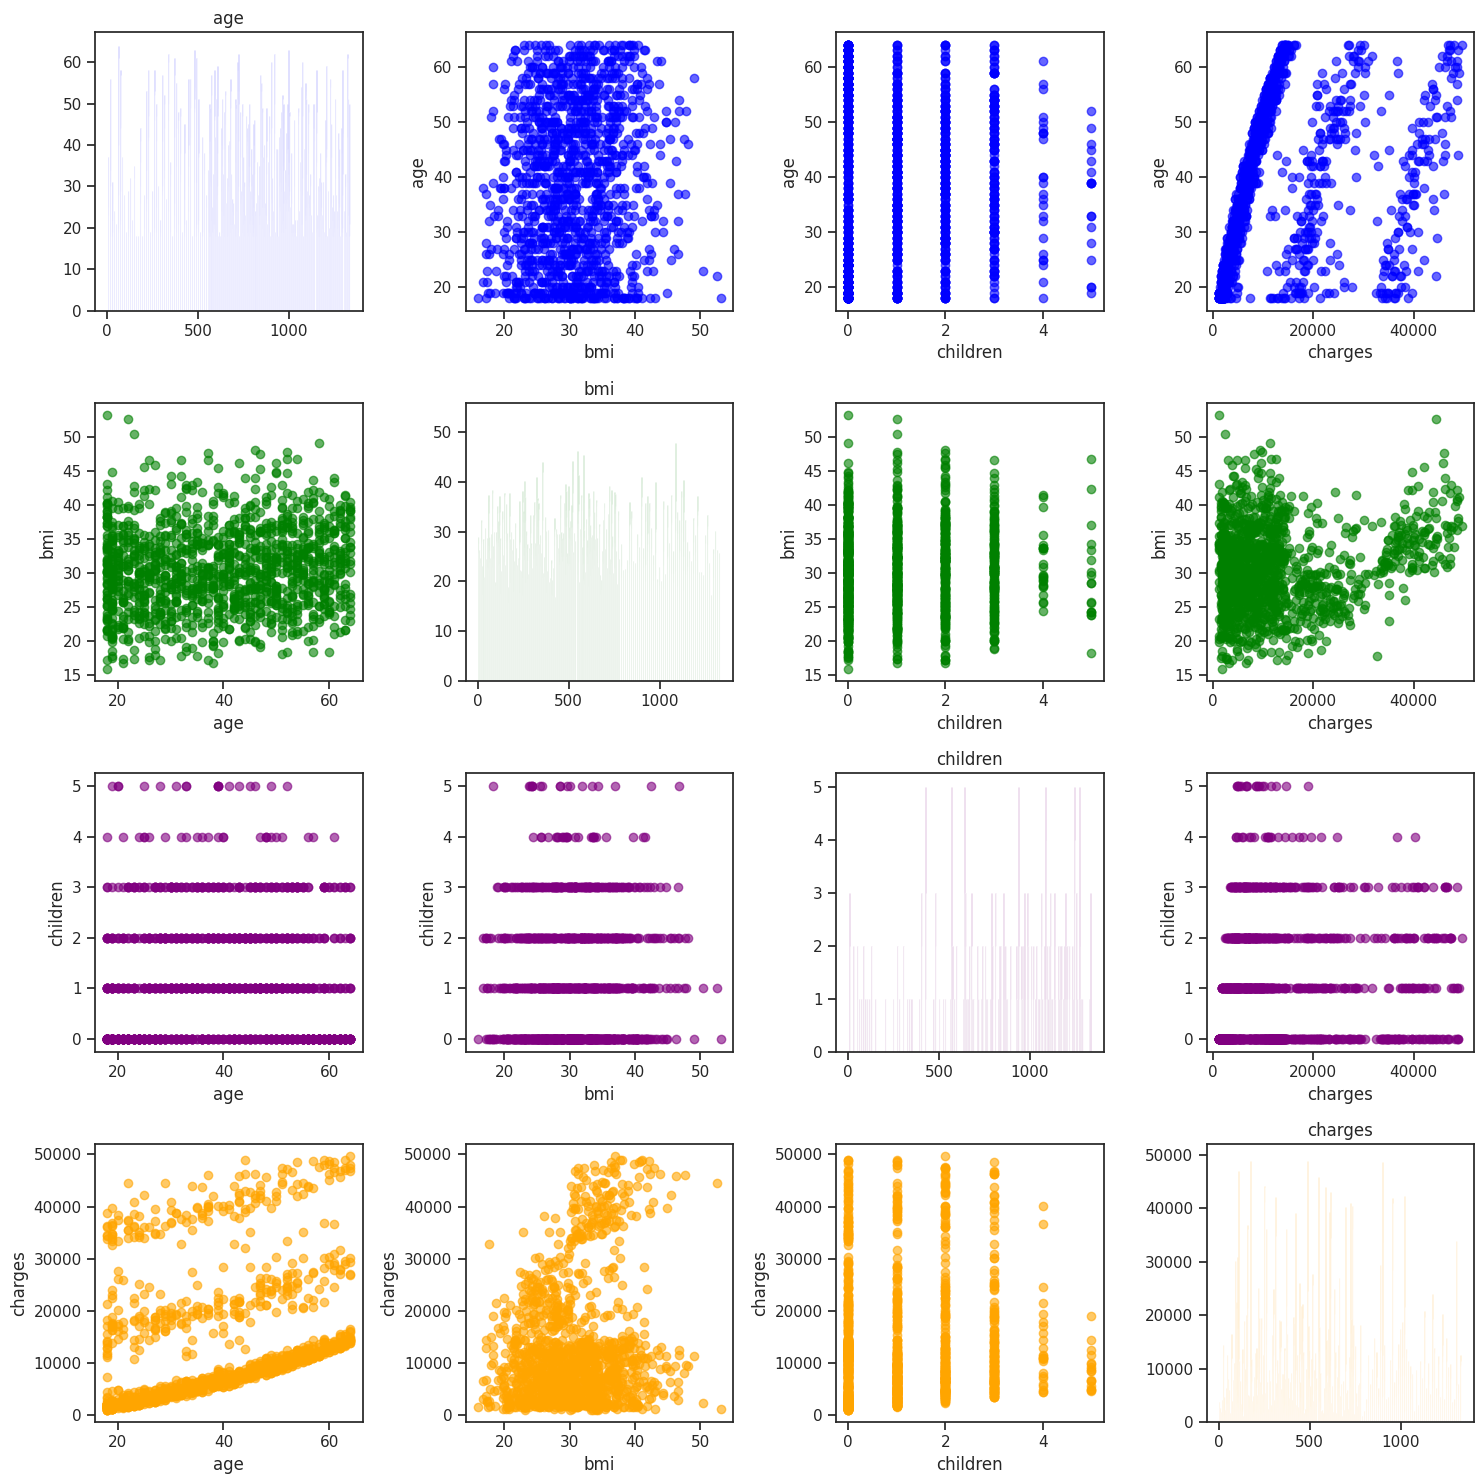

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style='ticks', context='notebook')

cols = ['age', 'bmi', 'children', 'charges']
colors = ['blue', 'green', 'purple', 'orange']

num_cols = len(cols)
fig, axes = plt.subplots(num_cols, num_cols, figsize=(15, 15))

for i in range(num_cols):
    for j in range(num_cols):
        if i != j:
            axes[i, j].scatter(df[cols[j]], df[cols[i]], color=colors[i], alpha=0.6)
            axes[i, j].set_xlabel(cols[j])
            axes[i, j].set_ylabel(cols[i])
        else:
            axes[i, j].bar(df[cols[i]].index, df[cols[i]], color=colors[i], alpha=0.6)
            axes[i, j].set_title(cols[i])

plt.tight_layout()
plt.show()

Insigths:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

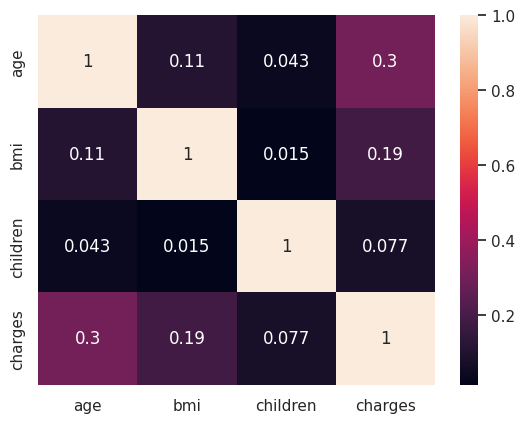

In [17]:
import numpy as np
numeric_cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1)
sns.heatmap(cm,annot=True, yticklabels=numeric_cols,xticklabels=numeric_cols);

## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función **[get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)** de pandas.

Ahora la verás en acción

In [18]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Creando modelos
Primero se usará un modelo con todas las variables.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
X_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [21]:
y_pred.shape

(333, 1)

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [22]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7463
mse:  0.2713


El siguiente código muestra un resumen general de los resultados.

In [23]:
from regressors import stats
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [24]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.8693 -0.1445  0.0528 0.2236 0.9217


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.005053    0.028751  -0.1757  0.860604
age               0.308899    0.027938  11.0565  0.000000
smoker_yes        0.798672    0.027680  28.8534  0.000000
region_southeast -0.032368    0.035098  -0.9222  0.357093
sex_male          0.010072    0.028905   0.3484  0.727729
region_southwest -0.026422    0.033250  -0.7946  0.427397
region_northwest -0.004096    0.032470  -0.1262  0.899688
children          0.049459    0.027695   1.7858  0.075042
bmi               0.158080    0.029907   5.2857  0.000000
---
R-squared:  0.74632,    Adjusted R-squared:  0.74005
F-statistic: 119.15 on 8 features


Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

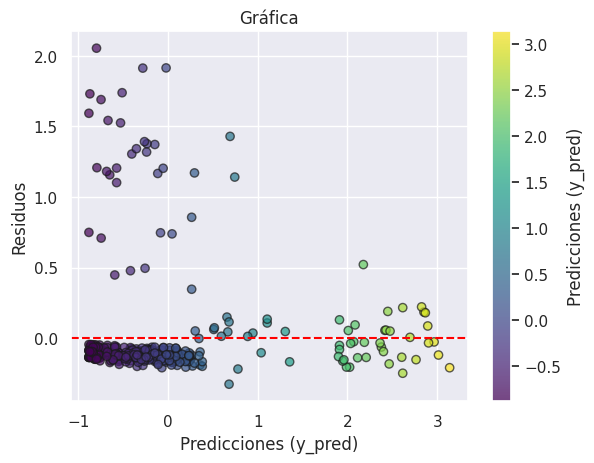

In [33]:
import numpy as np
import matplotlib.pyplot as plt

residuals = np.subtract(y_test, y_pred.reshape(-1))

plt.scatter(y_pred, residuals, c=y_pred, cmap='viridis', edgecolor='k', alpha=0.7)

plt.xlabel('Predicciones (y_pred)')
plt.ylabel('Residuos')
plt.title('Gráfica')
plt.axhline(0, color='red', linestyle='--')
plt.colorbar(label='Predicciones (y_pred)')
plt.show()

## Segundo modelo


In [26]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso*fumador'] = df_second.sobrepeso * df_second.smoker_yes

Analizando el segundo modelo

In [27]:
X_cols = ['sobrepeso*fumador', 'smoker_yes', 'age2', 'children']
y_col = ['charges']

X = df_second[X_cols].values
y = df_second[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [28]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.822
mse:  0.1853


In [29]:
model.coef_ = model.coef_.reshape(-1)

In [30]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min     1Q  Median     3Q    Max
-2.0529 0.0643   0.114 0.1393 0.3259


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.023767   0.0000  1.000000
sobrepeso*fumador  0.505649    0.031854  15.8738  0.000000
smoker_yes         0.449553    0.035112  12.8034  0.000000
age2               0.332555    0.022868  14.5424  0.000000
children           0.074907    0.023361   3.2065  0.001474
---
R-squared:  0.82200,    Adjusted R-squared:  0.81983
F-statistic: 378.67 on 4 features


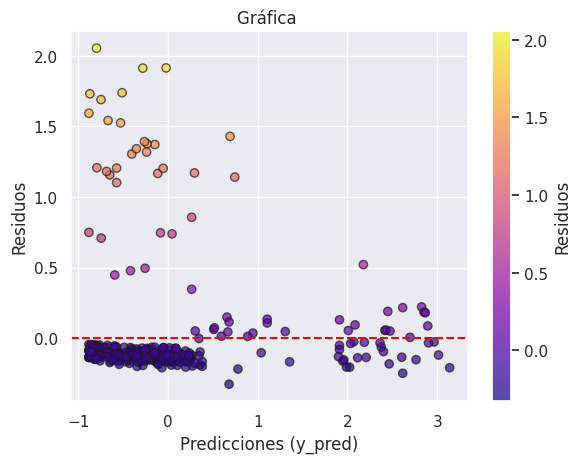

In [36]:
import numpy as np
import matplotlib.pyplot as plt

residuals = np.subtract(y_test, y_pred.reshape(-1))

plt.scatter(y_pred, residuals, c=residuals, cmap='plasma', edgecolor='k', alpha=0.7)

plt.xlabel('Predicciones (y_pred)')
plt.ylabel('Residuos')
plt.title('Gráfica ')
plt.axhline(0, color='red', linestyle='--')
plt.colorbar(label='Residuos')
plt.show()
